<a href="https://colab.research.google.com/github/nbeeeel/CodeClause_Wine_Quality/blob/main/Task_1_Wine_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the necssary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

#Importing data from Kaggle

**Importing kaggle.json from kaggle account to authorize dataset import**

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 9.44MB/s]


In [9]:
!unzip red-wine.zip

Archive:  red-wine.zip
  inflating: winequality-red.csv     


#Data Reading and Analysis

In [10]:
df=pd.read_csv('/content/winequality-red.csv')

**There are 11 features and 1 target variable i.e. "quality"**

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

**Features are of float64 datatype and the target variable is integer**

In [13]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**The shape of the dataset is 1599 by 12, where 1599 are the number of rows or values for each feature and 12 is the total number of features**

In [14]:
df.shape

(1599, 12)

**There are no null values in either of the 12 feature and target columns, hence no need to impute the missing values**

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**The below metrics shows the standard deviation and other characteristics of statistical significance. According to the data below, free sulfur dioxide and total sulfur dioxide have the highest standard deviation. Hence they have the highest unpredictibilty index**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


#Visualizing and Feature Analysis, Engineering and Reduction

**The below visualization for the distribution of the features show the distribution of both high std features of the extreme left side, which suggests an acknowledgeable degree of correlation between the two**

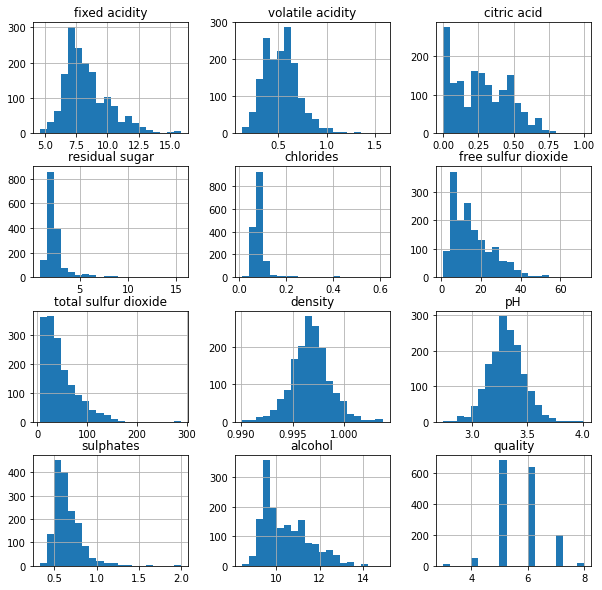

In [17]:
df.hist(bins=20,figsize=(10,10))
plt.show()

**The below metrics for the correlation shows the correlation between free and total sulfur dioxide to be greater then 0.6.**

In [18]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**The charts below show the relation between the quality and each of the features. According to the below barplot, free and total sulfur affect the quality in a proportional manner.Moreover, density and pH show no significant impact on the quality. Hence we will drop both density and pH for now**

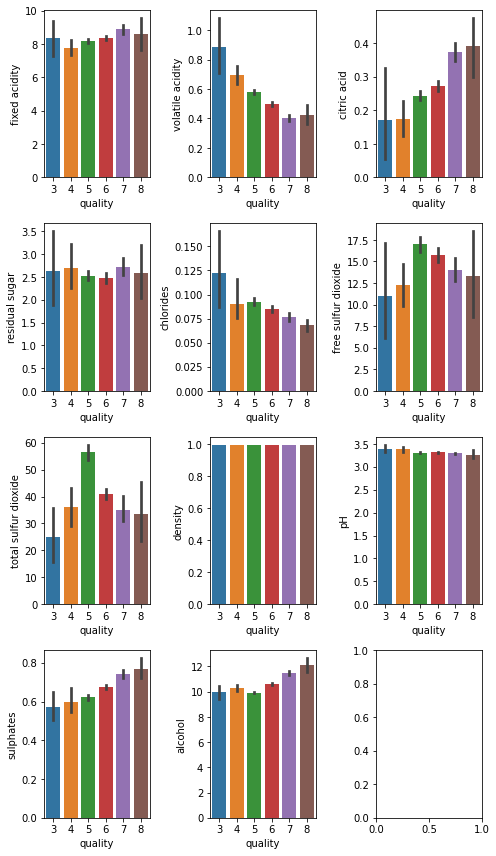

In [19]:
f, axs = plt.subplots(4,3,figsize=(7,12))
sns.barplot(x=df["quality"],y=df["fixed acidity"],ax=axs[0][0])
sns.barplot(x=df["quality"],y=df["volatile acidity"],ax=axs[0][1])
sns.barplot(x=df["quality"],y=df["citric acid"],ax=axs[0][2])
sns.barplot(x=df["quality"],y=df["residual sugar"],ax=axs[1][0])
sns.barplot(x=df["quality"],y=df["chlorides"],ax=axs[1][1])
sns.barplot(x=df["quality"],y=df["free sulfur dioxide"],ax=axs[1][2])
sns.barplot(x=df["quality"],y=df["total sulfur dioxide"],ax=axs[2][0])
sns.barplot(x=df["quality"],y=df["density"],ax=axs[2][1])
sns.barplot(x=df["quality"],y=df["pH"],ax=axs[2][2])
sns.barplot(x=df["quality"],y=df["sulphates"],ax=axs[3][0])
sns.barplot(x=df["quality"],y=df["alcohol"],ax=axs[3][1])
f.tight_layout()

**Similarly the heatmap, shows the fixed acidity to be a redundant feature. With the above barplot, we see little effect of fixed acidity on the quality, hence we will drop it along with the density**

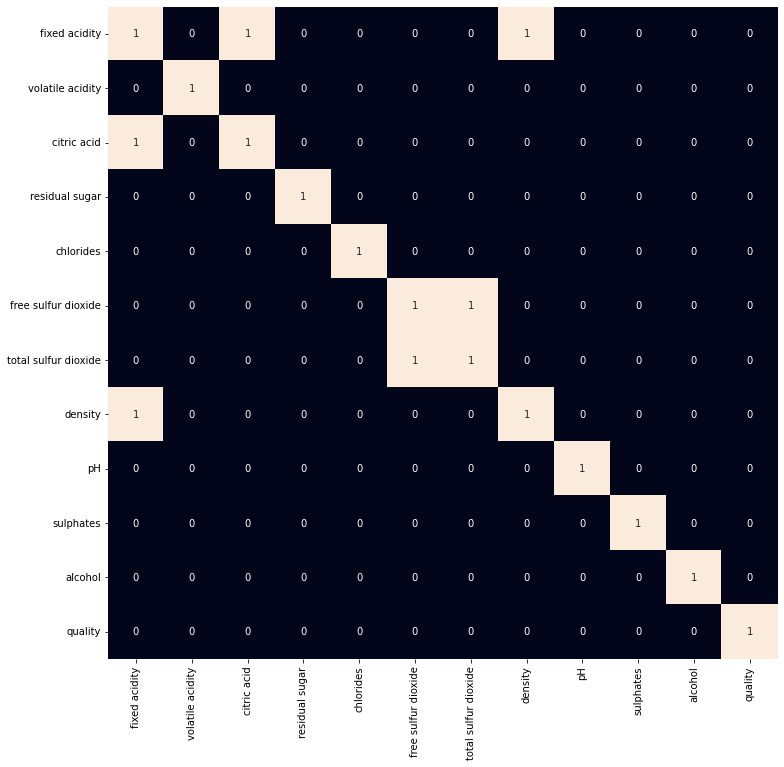

In [20]:
plt.figure(figsize=(12,12)),
sns.heatmap(df.corr()>0.6, annot=True, cbar=False)
plt.show()

In [21]:
df=df.drop(['density','fixed acidity'],axis=1)

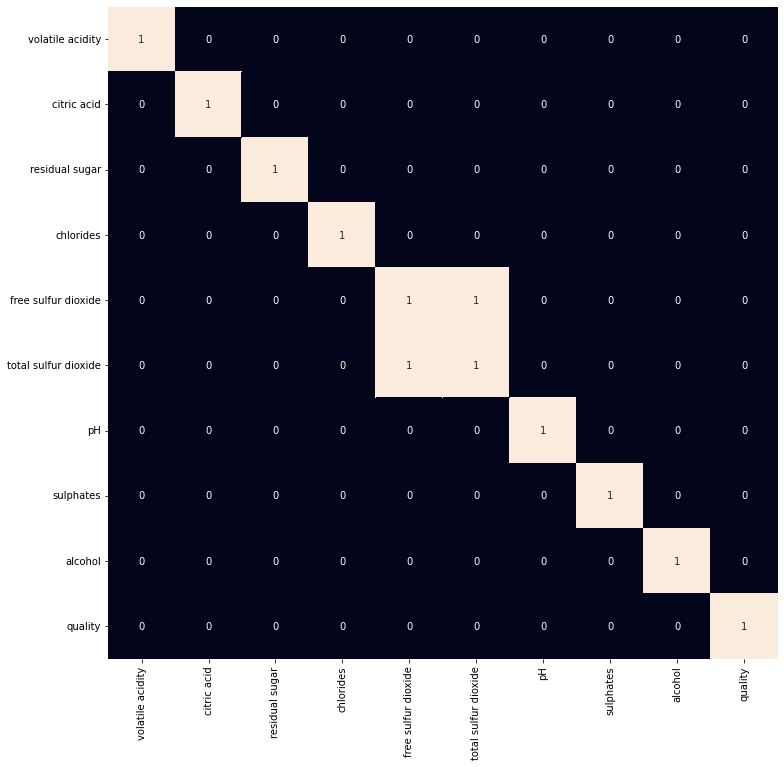

In [22]:
plt.figure(figsize=(12,12)),
sns.heatmap(df.corr()>0.6,annot=True,cbar=False)
plt.show()

In [23]:
df.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166
quality,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.057731,0.251397,0.476166,1.000000


**Now we see from above correlation table that both free and total sulfur are significantly correlated, however, the impact of both on the quality is significant. So we will take the average of both the columns and create a new column, to retain the characteristics of both the features and reduce the redundancy**

In [24]:
df['SOxides']=(df['free sulfur dioxide']+df['total sulfur dioxide'])/2

In [25]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,SOxides
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,22.5
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,46.0
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,34.5
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,38.5
4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,22.5


In [26]:
df.corr()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,SOxides
volatile acidity,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.234937,-0.260987,-0.202288,-0.390558,0.059205
citric acid,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,-0.541904,0.312770,0.109903,0.226373,0.013069
residual sugar,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,-0.085652,0.005527,0.042075,0.013732,0.212521
chlorides,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,-0.265026,0.371260,-0.221141,-0.128907,0.039807
free sulfur dioxide,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,0.070377,0.051658,-0.069408,-0.050656,0.797966
total sulfur dioxide,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,-0.066495,0.042947,-0.205654,-0.185100,0.981463
pH,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,1.000000,-0.196648,0.205633,-0.057731,-0.035715
sulphates,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,-0.196648,1.000000,0.093595,0.251397,0.048067
alcohol,-0.202288,0.109903,0.042075,-0.221141,-0.069408,-0.205654,0.205633,0.093595,1.000000,0.476166,-0.184362
quality,-0.390558,0.226373,0.013732,-0.128907,-0.050656,-0.185100,-0.057731,0.251397,0.476166,1.000000,-0.162895


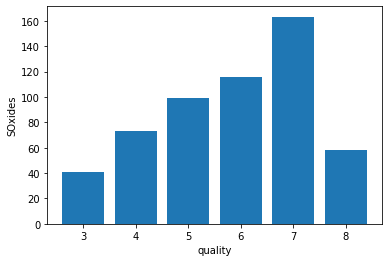

In [27]:
plt.bar(df['quality'],df['SOxides'])
plt.xlabel('quality')
plt.ylabel('SOxides')
plt.show()

In [30]:
df=df.drop(['free sulfur dioxide','total sulfur dioxide'],axis=1)

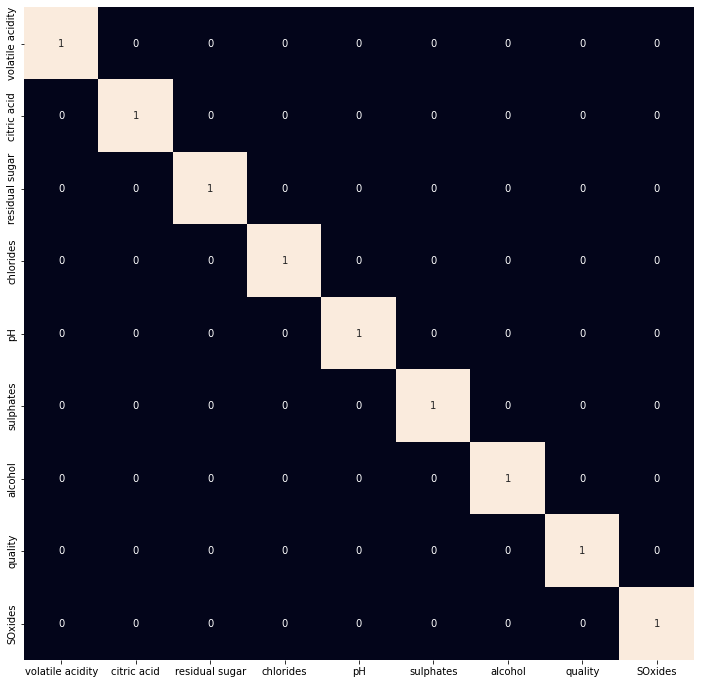

In [31]:
plt.figure(figsize=(12,12)),
sns.heatmap(df.corr()>0.7,annot=True,cbar=False)
plt.show()

In [32]:
print(df.quality.min())
print(df.quality.max())

3
8


In [33]:
df['good_quality']=[1 if x>5 else 0 for x in df.quality]

In [34]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,alcohol,quality,SOxides,good_quality
0,0.70,0.00,1.9,0.076,3.51,0.56,9.4,5,22.5,0
1,0.88,0.00,2.6,0.098,3.20,0.68,9.8,5,46.0,0
2,0.76,0.04,2.3,0.092,3.26,0.65,9.8,5,34.5,0
3,0.28,0.56,1.9,0.075,3.16,0.58,9.8,6,38.5,1
4,0.70,0.00,1.9,0.076,3.51,0.56,9.4,5,22.5,0


In [35]:
df=df.drop(['quality'],axis=1)

#Preprocessing Data

In [37]:
X_values=df.drop(['good_quality'],axis=1)
Y_values=df['good_quality']

In [38]:
X_values.head()

,volatile acidity,citric acid,residual sugar,chlorides,pH,sulphates,alcohol,SOxides
0,0.70,0.00,1.9,0.076,3.51,0.56,9.4,22.5
1,0.88,0.00,2.6,0.098,3.20,0.68,9.8,46.0
2,0.76,0.04,2.3,0.092,3.26,0.65,9.8,34.5
3,0.28,0.56,1.9,0.075,3.16,0.58,9.8,38.5
4,0.70,0.00,1.9,0.076,3.51,0.56,9.4,22.5


In [39]:
Y_values.head()

0    0
1    0
2    0
3    1
4    0
Name: good_quality, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X_values,Y_values,test_size=0.2,random_state=32)

In [41]:
print(x_train.shape)
print(x_test.shape)

(1279, 8)
(320, 8)


In [48]:
y_test.shape

(320,)

In [45]:
normalizing=MinMaxScaler()
x_train=normalizing.fit_transform(x_train)
x_test=normalizing.transform(x_test)

#Model : 1 -- Logistic Regression

**In each of the three models, we will determine the efficiency of the model by the ROC_AUC Score. ROC_AUC score computes the area under the curve for the TP(True Positives) and the FP(Positives)**

In [73]:
model=LogisticRegression(solver="liblinear").fit(x_train,y_train)
preds=model.predict_proba(x_test)

In [74]:
new_preds=[]
for i in range(len(preds)):
  temp=(preds[i])[1]
  new_preds.append(temp)

In [76]:
roc_auc=metrics.roc_auc_score(y_test,new_preds,multi_class='ovr')

**ROC_AUC_SCORE**

In [77]:
print(roc_auc)

0.7680912374690532


#Model : 2 -- XGB Classifier

In [78]:
model1=XGBClassifier()
model1.fit(x_train,y_train)
preds1=model1.predict_proba(x_test)

In [79]:
new_preds1=[]
for i in range(len(preds1)):
  temp=(preds1[i])[1]
  new_preds1.append(temp)

In [81]:
roc_auc1=metrics.roc_auc_score(y_test,new_preds1,multi_class='ovr')

**ROC_AUC_SCORE**

In [82]:
print(roc_auc1)

0.810990705791631


#Model : 3 -- Support Vector Classifier

In [83]:
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)
preds2=model2.predict(x_test)

In [89]:
roc_auc2=metrics.roc_auc_score(y_test,preds2,multi_class='ovr')

**ROC_AUC_SCORE**

In [90]:
print(roc_auc2)

0.6967003530987459
